# `CLASSIFICATION`

* Datasets loaded by Scikit-Learn generally have a similar dictionary structure Including::
    * A DESCR key describing the dataset
    * A data key containing an array with one row per instance and one column per feature
    * A target key containing an array with the labels

* There are 70000 and each image has 784 features.
* This is because each image is 28*28 pixels, and each pixel represents one pixel's intensity, from 0 (`white`) to 255 (`black`).
* To take a peek at one digit from the dataset you need to grab an instance's feature vector, reshape it to a 28*28 array, and display it using `Matplotli'bs imshow()` function


In [7]:
import pandas as pd
mnist_train = pd.read_csv('Mnist/mnist_train.csv')
mnist_test = pd.read_csv('Mnist/mnist_test.csv')
mnist_train.shape


(13200, 785)

In [6]:
# mnist_train1 = mnist_train.sample(frac=0.5).reset_index(drop=True)

In [3]:
# mnist_train1.to_csv('Mnist/mnist_train.csv', index=False)

In [3]:
mnist_train.shape
y_train = mnist_train['label'].copy()
y_test = mnist_test['label'].copy()
y_train.shape
y_test.shape
#y_train.head(5)

X_train = mnist_train.drop(columns='label',axis=1)
X_train.shape
X_test = mnist_test.drop(columns='label', axis=1)
X_test.shape

# some_digit = X_train.iloc[0]
# some_digit

(10000, 784)

In [4]:
# mnist_train.keys()
# mnist_train.shape
# mnist_trn_label = mnist_train['label']
# mnist_trn_label
# mnist_trn = mnist_train.drop(labels='label',axis=1)

In [5]:
# mnist_trn.shape
# mnist_trn_label.shape


In [6]:
# import matplotlib as mpl
# import matplotlib.pyplot as plt

# some_digit = mnist_trn[3]
# some_digit_image = some_digit.reshape(28,28)
# plt.imshow(some_digit_image,cmap=mpl.cm.binary, interpolation='nearest')
# plt.axis('off')
# plt.show()

In [7]:
# from sklearn.datasets import fetch_openml
# mnist = fetch_openml('mnist_784', version=1)
# mnist.keys()

In [8]:
# X,y = mnist["data"], mnist["target"]
# X.shape
# y.shape
# X.head()
# y.head()
# # some_digit = X.iloc[0]
# # some_digit


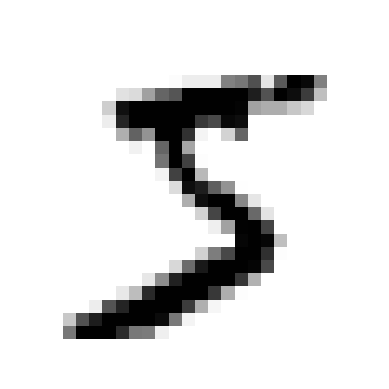

In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X_train.iloc[0]
some_digit1 = some_digit.to_numpy()
some_digit_image = some_digit1.reshape(28,28)
plt.imshow(some_digit_image,cmap=mpl.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

* The label is a string. let's cast y to integers.

In [10]:
# import numpy as np
# mnist.keys()
# X,y = mnist["data"],mnist["target"]
# X.shape
# y.shape
# y[0]

# y = y.astype(np.uint8)

* U shd always create a test set and set it aside b4 inspecting the data closely.
* The training set is already shuffled for us, which is good as this guarantees that all cross-validation folds will be similar(`you don't want one fold to be missing some digits`).
* Moreover, some learning algorithms are sensitive to the order of the training instances, and they perform poorly if they get many similar instances in a row( shuffling ensures this won't happen.)

In [11]:
# X_train, X_test, y_train, y_test = X[:60000], X[60000:],y[:60000],y[60000:]

`Training a Binary Classifier`
* Capable of distinguishing between just two classes....eg.,5 and not-5

In [12]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

* Pick a classifier and train it
* `Stochastice Gradient Descent classifier` using SGDClasiifier class.
* The classifier has an advantage of being capable of handling very large datasets efficiently.
* This is in part because SGD deals with training instances independently, one at a time ( which also makes SGD well suited for online learning).

In [13]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

* The SGDClassifier relies on randomness during training( hence the name "stochastic").
* If you want reproducible results, you should set the random_state parameter.

In [14]:
sgd_clf.predict([some_digit])

/home/kasyima/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

`Perfomance Measures`




`Measuring Accuracy Using Cross-Validation`

* A good way to evaluate a model is to use cross-validation.

`Implementing Cross-Validation`

* Occasionally you will need more control over the cross-validation process than what Sklearn provides off-the-shelf.
* In these cases, you can implement cross-validation yourself; it is actually fairly straightforward.
* The following code does roughly the same thing as Scikit-Learn's `cross_val_score()` function, and prints the same result::


In [15]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, shuffle=True,random_state=42,)

# for train_index, test_index in skfolds.split(X_train, y_train_5):
#     clone_clf = clone(sgd_clf)
#     X_train_folds = X_train[train_index]
#     y_train_folds = y_train_5[train_index]
#     X_test_fold = X_test[test_index]
#     y_test_fold = y_test_5[test_index]

#     clone_clf.fit(X_train_folds, y_train_folds)
#     y_pred = clone_clf.predict(X_test_fold)
#     n_correct = sum(y_pred == y_test_fold)
#     print(n_correct / len(y_pred))



* The `StratifiedKFold` class performs stratified sampling to produce folds that contain a representative ratio of each class.
* At each iteration the code creates a clone of the classifier, trains that clone on the training folds, and makes predictions on the test fold.
* Then it counts the number of correct predictions and outputs the ratio of correct predictions.

* Let's use the `cross_val_score()` to evaluate your `SGDClassifier` model using K-fold cross-validation, with three folds. Remember that K-fold cross-validation means splitting the training set into K-folds(in this case, three), then making predictions and evaluating them on each fold using a model trained on the remaining folds:

In [16]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3,scoring="accuracy")


array([0.95035, 0.96035, 0.9604 ])

* Wow! Above 93% accuracy (ratio of correct predictions) on all cross-validation folds?
* Let's look at a very dumb classifier that just classifies every single image in the "not-5" class.

In [17]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X),1),dtype=bool)

In [18]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy",)

/home/kasyima/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/kasyima/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/kasyima/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/home/kasyima/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/kasyima/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/tmp/ipykernel_20838/432860962.py", line 7, in predict
    return 

array([nan, nan, nan])

* Accuracy is generally not the preferred performance measure for classifiers, especially when you are dealing with skewed datasets.(i.e., when some classes are much more frequent than others).

`Confusion Matrix`

* A better way to evaluate the performance of a classifier is to look at the `confusion matrix`.
* The general idea is to count the number of times instances of classs A are classified as class B.
* To compute the confusion matrix, you first need to have a set of predictions, so they can be compared to the actual targets.
* You cd make predictions on the test set, but let's keep it untouched for now(remember that you want to use the test set only at the very end of your project, once you have a classifier that you are ready to launch).
* Instead, you can use the `cross_val_predict()`::

In [19]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,)

* `cross_val_predict()` performs K-fold cross-validation, but instead of returning the evaluation scores, it returns the predictions made on each test fold.
* This means that you gget a clean prediction for each instance in the training set ("clean" meaning that the prediction is made by a model that never saw the data during training).
* Now you are ready to get the confusion matrix using the `confusion_matrix()`.
* Just pass it the target classes (y_train_5) and the predicted classes (y_train_pred):

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

* Each row in a confusion matrix represents an `actual class`, while each column represents a `predicted class`. 
* A perfect classifier would have only true positives and true negatives, so its confusion matrix would have nonzero values only on its main diagonal(top left to bottom right)


In [21]:
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

* The confusion matrix gives you a lot of information, but sometimes you may prefer a more concise metric.
* An interesting one to look at is the accuracy of the positive predictions; this is called the `precision` of the classifier.
* `precision = TP/TP+FP`
* TP--> number of true +'s and FP--> number of false +'s.



* A trivial way to have perfect precision is to make one single positive prediction and ensure it is correct(precision = 1/1 = 100%).This wdn't be very useful since the classifier wd ignore all but one +ve instance.
* So precision is typically used with another metric named `recall`, also called `sensitivity` or `true positive rate`(TPR): this is the ratio of positive instances that are correctly detected by the classifier.

`Precision and Recall`
* Scikit-Learn provides several functions to compute classifier metrics, including precision and recall.

In [22]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)
recall_score(y_train_5, y_train_pred)

0.6511713705958311

* It is often convenient to combine precision and recall into a single metric called the `F1 score`, in particular if you need a simple way to compare two classifiers.
* The F1 score is the `harmonic mean` of precision and recall.
* Whereas the regular mean treats all values equally, the harmonic mean gives much more weight to low values.
* As a result, the classifier will only get a high F1 score if both recall and precision are high.

* `F1 = 2(/1/precision + 1/recall)= 2*(precision*recall)/(precision+recall) = TP/(TP+(FN+FP/2))`
* To compute the F1 score, simply call the F1_score():


In [23]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

* The F1 score favors classifiers that have similar precision and recall. 
* This is not always what you want: in some contexts you mostly care about precision, and in other contexts you really care about recall.
* Unfortunately, increasing precision reduces recall --->`precision/recall tradeoff`.

* `SGDClassifier` makes its classification decisions based on a `decision function`, and if that score is greater than a threshold, it assigns the instance to the positive class, or else it assigns it to the negative class.

* Scikit-Learn does not let you set the threshold directly, but it does give you access to the decision scores that it uses to make predictions.
* Instead of calling the classifier's `predict()`, you can call its `decision_function()`, which returns a score for each instance, and then make predictions based on those scores using any threshold you want:



In [24]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

/home/kasyima/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([2164.22030239])

In [25]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

* The SGDClassifier uses a threshold equal to 0, so the previous code returns the same result as the `predict()`.

In [26]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

* This confirms that raising the threshold decreases recall.
* How to decide which threshold to use??
* You will first need to get the scores of all instances in the training set using the `cross_val_predict()` again, but this time specifying that you want it to return decision scores instead of predictions::

In [27]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

* With these scores, you can compute precision and recall for all possible threshold using the `precision_recall_curve()`::

In [28]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)


* Plotting precision and recall as functions of the threshold value.

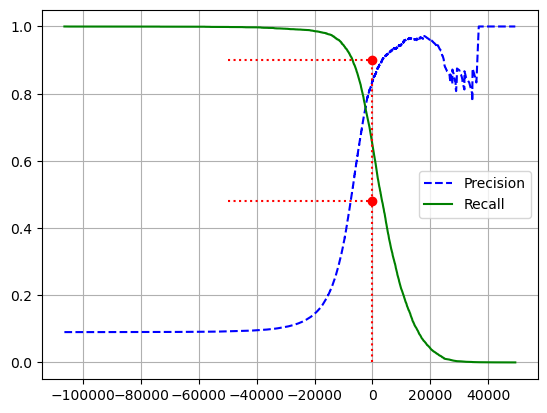

In [29]:
import numpy as np
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds,precisions[:-1],"b--",label="Precision")
    plt.plot(thresholds, recalls[:-1],"g-", label="Recall")
    plt.legend()
    plt.grid(True)
    


    # plt.xlabel("Threshold")
    #plt.xlabel("Value")
    #plt.ylabel("Frequency")
    # plt.axis(-50000,50000,0,1,)

recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = precisions[np.argmax(precisions >= 0.90)]
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:") 
#plt.figure(figsize=(8, 4))                  # Not shown
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown
#save_fig("precision_recall_vs_threshold_plot")                                              
plt.show()

* The reason the precision curve is bumpier than the recall curve is that precision may sometimes go down when you raise the threshold (although in general it will go up).
* On the other hand, recall can only go down when the threshold is increased, which explains why its curve looks smooth

* Another way to select a good precision/recall tradeoff is to plot precision directly against recall.

Text(0.5, 1.0, 'Curve')

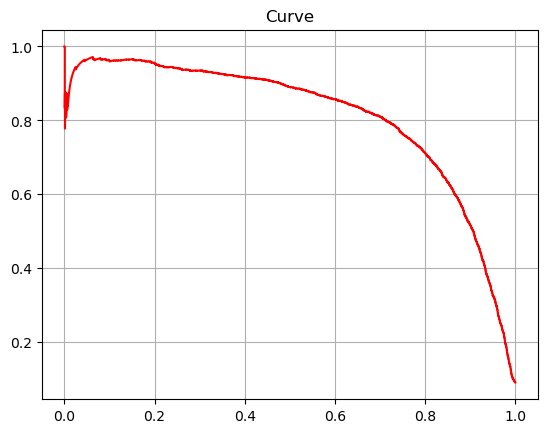

In [30]:
%matplotlib inline
plt.plot(recalls, precisions, "r-", )

#plt.figure(figsize=(10,8))
plt.grid(True)
plt.axis('on')
plt.title('Curve')
# plt.ylabel('precision')
#plt.show()

* To make predictions (on the training set for now), instead of calling the classifier's `predict()`, you can just run this cd:

In [31]:
threshold_90_precision= thresholds[np.argmax(precisions >= 0.90)]
y_train_pred_90 = (y_scores >= threshold_90_precision)
precision_score(y_train_5, y_train_pred_90)
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

`THE ROC CURVE`

* The `receiver operating characteristics (ROC)` curve is another common tool used with binary classifiers.
* It is very similar to the precision\recall curve, but instead of plotting precision versus recall, the ROC curve plots the `true positive rate` (another name for recall) against the `false positive rate`.
* The FPR is the ratio of negative instances that are incorrectly classified as positive.
* It is equal to one minus the `true negative rate`, which is the ratio of -ve instances that are correctly classified as -ve.
* the TNR is also called `specificity`.
* Hence the ROC curve plots `sensitivity`(recall) versus 1 - `specificity`.
* To plot the ROC curve, you first need to compute the TPR and FPR for various threshold values, using the `roc_curve()`.

In [32]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)



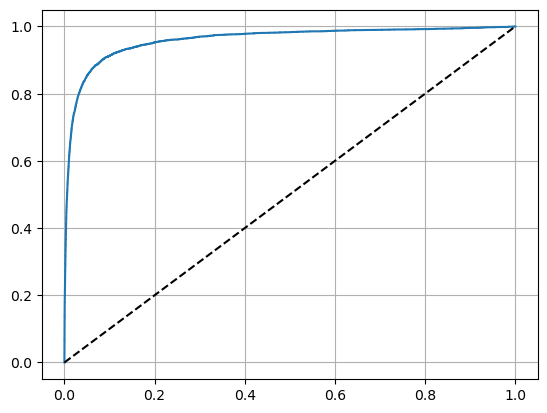

In [33]:
def roc_curve_plot(fpr, tpr, label=None):
    plt.plot(fpr, tpr, label= label)
    plt.plot([0,1],[0,1],'k--')
    plt.grid(True)
roc_curve_plot(fpr,tpr)
plt.show()

* The higher the recall (TPR), the more false positives (FPR) the classifier produces.
* The dotted line represents the ROC curve of a purely random classifier; a good classifier stays away from that line as possible(toward the top-left corner).
* One way to compare classifiers is to measure the `area under the curve` (AUC).
* A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5.
* Scikit-Learn provides a function to compute the ROC AUC:

In [34]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

* Since the ROC curve is so similar to the precision/recall (or PR) curve, you may wonder how to decide which one to use. As a rule of thumb, you should prefer the PR curve whenever the positive class is rare or when you care more about the false positives than the false negatives, and the ROC curve otherwise.
* For example, looking at the previous ROC curve (and the ROC AUC score), you may think that the classifier is really good. But this is because there are few positives (5s) compared to the negatives (non-5s). In contrast, the PR curve makes it clear that the classifier has room for improvement (the curve cd be closer to the top-right corner).

`RandomForestClassifier`
* 1'st you need to get scores for each instance in the training set. 
* The classifier has `predict_proba()` which returns an array containing a row per instance and a column per class, each containing the probability that the given instance belongs to the given class

In [35]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf,X_train, y_train_5, cv = 3, method="predict_proba")


* To plot a ROC curve, you need scores, not prababilties. A sln is to use the positives class's probability as the score:

In [36]:
y_scores_forest = y_probas_forest[:, 1]# score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

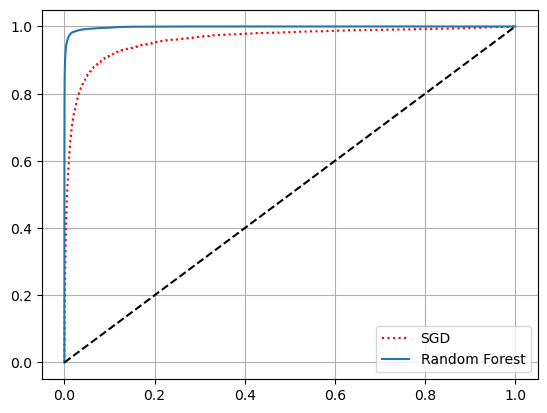

In [37]:
plt.plot(fpr, tpr, "r:", label="SGD")
roc_curve_plot(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()


* The `RandomForestClassifier's` ROC curve looks much better than the `SGDClassifier's`: it comes much closer to the top-left corner.
* As a result, its ROC AUC score is also significantly better:

In [38]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

` Hopefully you know how to train binary classifiers, choose the appropriate metric for your task, evaluate your classifiers using cross-validation, select the precision/recall tradeoff that fits your needs, and compare various models using ROC curves and ROC AUC scores`

`MULTICLASS CLASSIFICATION`

* Where as binary classifiers distinguish between two classes, `multiclass classifiers(multinomial classifiers)` can distinguish between more than two classes.
* Some algorithms (Random Forest classifiers OR naive Bayes classifiers) are capable of handling multiple classes directly.
* Others (Support Vector Machine classifiers or Linear classifiers) are strictly binary classifiers.
* There are various strategies that you can use to perform multiclass classification using multiple binary classifiers.




- - Eg., one way to create a system that can classify the digit images into 10 classes(from 0 to 9) is to train 10 binary classifiers, one for each digit (a 0-detector, a 1-detector etc). Then when you want to classify an image, you get the decision score from each classifier for that image and you select the class whose classifier outputs the highest score. This is called the `one-versus-all(OvA)` strategy (`one-versus-the-rest`).

- - Another strategy is to train a binary classifier for every pair of digits: one to distinguish 0s and 1s, another to distinguish 0s and 2s, another for 1s and 2s, and so on.
    - This is called the `one-versus-one(OvO)` strategy. If there are N classes, you need to train N * (N-1) / 2 classifiers.
    - For the MNIST problem. this means training 45 binary classifiers! When you want to classify an image, you have to run the image through all 45 classifiers and see which class wins the most duels.
    - The main advantage of OvO is that each classifier only needs to be trained on the part of the training set for the two classes that it must distinguish.
    - Some algorithms scale poorly with the size of the training set, so for these algorithms OvO is preferred since it is faster to train many classifiers on small training sets than training few classifiers on large training sets.
    - For most binary classification algorithms, however, OvA is preferred.

* Scikit-L detects when you try to use a binary classification algorithm for a multiclass classification task, and it automatically runs OvA(`except for SVM classifiers for which it uses OvO`)

In [39]:
some_digit
y_train[0]
# X_train.iloc[0]

5

In [40]:
sgd_clf.fit(X_train, y_train) # y_train, not y_train_5
sgd_clf.predict([some_digit])

/home/kasyima/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([3])

*   - This code trains the SGDClassifier on the training set using the original target classes from 0 to 9 (y_train), instead of the 5-versus-all target classes (y_train_5). Then it makes a prediction (a correct one in this case).
    - Under the hood, SKlearn actually trained 10 binary classifiers, got their decision scores for the image, and selected the class with the highest score.
    - To see that, u can call `decision_function()` Instead of returning just one score per instance, it now returns 10 scores, one per class.

In [41]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

/home/kasyima/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [42]:
np.argmax(some_digit_scores)
sgd_clf.classes_
sgd_clf.classes_[3]

3

* - When a classifier is trained, it stores the list of target classes in its `classes_` attribute, ordered by value. In this case, the index of each class in the `classes_` array conveniently matches the class itself(eg., the class at index 5 happens to be class 5), but in general you won't be so lucky.

* - If you want to force sklearn to use one-versus-one or one-versus-all, you can use the `OneVsOneClassifier` or `OneVsRestClassifier` classes.
    - Simply create an instance and pass a binary classifier to its constructor
    - For example, this code creates a multiclass classifier using the OvO strategy, based on a `SGDClassifier`:

In [43]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

/home/kasyima/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but OneVsOneClassifier was fitted with feature names
  warnings.warn(


array([5])

In [44]:
len(ovo_clf.estimators_)

45

* Training a `RandomForestClassifier` is jst as easy:

In [45]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

/home/kasyima/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([5])

* This time Scikit-L didn't have to run OvA or OvO bcs `Random Forest classifiers` can directly classify instances into multiple classes. You can call `predict_proba()` to get the list of probabilities that the classifier assigned to each instance for each class:::

In [46]:
forest_clf.predict_proba([some_digit])

/home/kasyima/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([[0.  , 0.  , 0.01, 0.08, 0.  , 0.9 , 0.  , 0.  , 0.  , 0.01]])

* You can see that the classifier is fairly confident about its prediction: the 0.9 at the 5^th index in the array means that the model estimates a 90% probability that the image represents a 5. It also thinks that the image could instead be a 2, a 3 or a 9, respectively with 1%, 8% and 1% probability.

* Now of course you want to evaluate these classifiers. As usual, you want to use cross-validation. Let's evaluate the `SGDClassifier's` accuracy using the `cross_val_score()` :::

In [47]:
cross_val_score(sgd_clf,X_train, y_train, cv=3, scoring="accuracy")


array([0.87365, 0.85835, 0.8689 ])

* It gets over 84% on all test folds. If you used a random classifier, you would get 10% accuracy, so this is not such a bad score, but you can still do much better.
* Scaling the inputs increases accuracy above 89%::::

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

`ERROR ANALYSIS`

* We assume that you have found a promising model and you want to find ways to improve it.
* One way to do this is to analyze the types of errors it makes.

- First, u can lk at the confusion matrix.
- You need to make predictions using the `cross_val_predict()`, then call the `confusion_matrix()`, just like did earlier::

In [49]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

* That's a lot of numbers. It's often more convenient to look at an image representation of the confusion matrix, using Matplotlib's `matshow()`:::

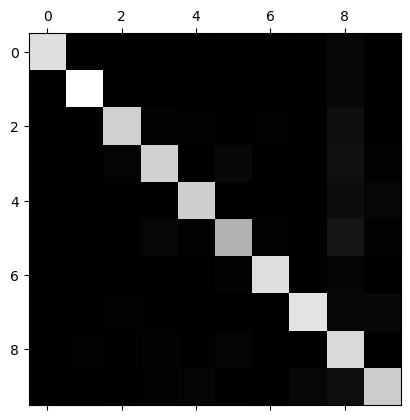

In [50]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

* This confusion matrix looks fairly good, since most images are on the main diagonal, which means that they were classified correctly. The 5s look slightly darker than the other dgts, which cd mean that there are fewer imgs of 5s in the dataset or that the classifier doesn't perform as well on 5s as on other dgts. In fact, you can verify that both are the case.
* Let's focus the plot on the errors. First, you need to divide each value in the confusion matrix by the number of images in the corresponding class, so you can compare error rates instead of absolute number of errors(which wd make abundant classes lk unfairly bad) :::

In [51]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

* Let's fill the diagonal with zeros to keep only the errors, and let's plot the result::

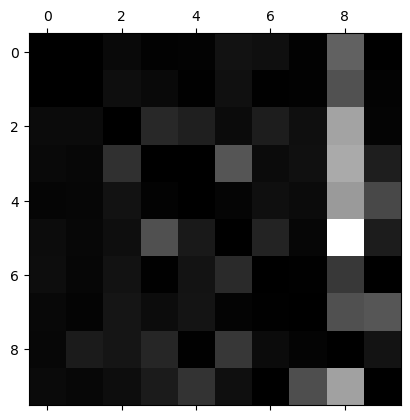

In [52]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

* You can clearly see the kinds of errors the classifier makes.
* The rows represent actual classes, while columns represent predicted classes.
* The column for class 8 is quite bright, which tells you that many images get misclassified as 8s.
* However, the row for class 8 is not that bad, telling you that actual 8s in general get properly classified as 8s.
* As you can see, the confusion matrix is not necessarily symmetrical. You can also see that 3s and 5s often get confused (in both directions).

- Analyzing the confusion matrix can often give you insights on ways to improve your classifier.
- Looking at this plt, it seems that your efforts shd be spent on reducing the false 8s. eg., you cd try to gather more training data for digits that look lk 8s(but are not) so the classifier can learn to distinguish them frm real 8s.
* Or you cd engineer new features that wd help the classifier - for example, writing an algorithm to count the number of closed loops(e.g.,  8 has two, 6 has one, 5 has none). Or you cd preprocess the images (eg., using Scikit-Image, Pillow, or OpenCV) to make some patterns stand out more, such as closed loops.

* Analyzing individual errors can aslo be a good way to gain insights on what your classifier is doing and why it is failing, but it is more difficult and time-consumng.

- Let's plot examples of 3s and 5s (the plot_digits() function just uses Matplotlib's `imshow()`.)

In [53]:
# cl_a, cl_b = 3,5
# X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
# X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
# X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
# X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

# plt.figure(figsize=(8,8))
# plt.subplot(221);plot_digits(X_aa[:25], images_per_row=5)
# plt.subplot(222);plot_digits(X_ab[:25], images_per_row=5)
# plt.subplot(223);plot_digits(X_ba[:25], images_per_row=5)
# plt.subplot(224);plot_digits(X_bb[:25], images_per_row=5)
# plt.show()

* The reason for the errors is that we used a simple `SGDClassifier`, which is a linear model. All it does is assign a weight per class to each pixel, and when it sees a new img it just sums up the weighted pxl intensities to get a score for each class. So since 3s and 5s differ only by a few pixels, this model will easily confuse them.
- This classifier is quite sensitive to img shifting and rotation. So one way to reduice the 3/5 confusion wd be to preprocess the images to ensure that they are well centered and not too rotated. This will probably help reduce other errosr as well.

`MULTILABEL CLASSIFICATION`

- Until now each intance has always been assigned to just one class.
- In some cases you may want your classifier to output multiple classses for each instance.
- For example, consider a face-recognition classifier: what shd it do if it recognizes several people on the picture?  Of course it shd attach one tag per person it recognizes.
- Say the classifier has been trained to recognize three faces, Alice, Bob and Charlie; then when it is shown a picture of Alice and Charlie, it shd output [1,0,1] (meaning " Alice yes, Bob no, Charlie yes").
- Such a classification system that outputs multiple binary rags is called a `multilabel classification ` system.
- We won't go into face recognition just yet, but let's look at a simpler example, just foer illustration purposes.

In [54]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

- This code creates a `y_multilabel` array containing two target labels for each digit is large (7,8, or 9) and the second indicates whether or not it is odd.
- The next lines create a `KNeighborsClassifier` instance (which supports multilabel classification, but not all classifiers do) and we train it using the multiple targets array. Now you can make a prediction, and notice that it outputs two labels::

In [55]:
knn_clf.predict([some_digit])

/home/kasyima/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/home/kasyima/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([[False,  True]])

* There are many ways to evaluate a multilabel classifier, and selecting the right metric really depends on your project.
- Eg.,  one approach is to measure the F1 score for each individual label (or any other binary classifier metric discussed earlier), then simply compute the eaverage score. This code computes the average F1 score across all labels:

In [56]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

/home/kasyima/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/kasyima/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

0.976410265560605

* This assumes that all labels are equally important, which may not be the case. In particular, if you have many more pictures of Alice than Bob or Charlie, you may want to give more weight to the classifier's score on pictures of Alice.One simple option is to give each label a weight equal to its `support`(the number of instances with that target label). To do this, simply set `average = "weighted"` in the preceding code.

`MULTIOUTPUT CLASSIFICATION`

- The last type of classification task we are going to discuss here is called `multioutputmulticlass classification`(or simply `multioutput classification`).
- It is simply a generalization of multilabel classification where each label can be multiclass (i.e., it can have more than two possible values).
- To illustrate this, let's build a syatem that removes noise from images.
- It will take as input a noisy digit image, and it will(hopefully) output a clean digit image, represented as an array of pixel intensities, just like the MNIST images.
- Notice that the classifier's output is multilabel (one label per pixel) and each label can have multiple values (pixel intensity ranges 0 to 255).
- It is thus an example of a multioutput classification system.
- The line /b/ classification and regression is sometimes blurry, such as in this example. Arguably, predicting pixel intensity is more akin to regression than to classification. Moreover, multioutput systems are not limited to classification tasks; you could even have a system that outputs multiple labels per instance, including both class labels and value labels.

* Let's start by creating the training and test sets by taking the MNIST images and adding noise to their pixel intensities using NumPy's randint(). The target images will be the original images:::

In [57]:
noise = np.random.randint(0,100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

* Let's train the classifier and make it clean this image::

In [58]:
knn_clf.fit(X_train_mod, y_train_mod)
# clean_digit = knn_clf.predict([X_test_mod[some_index]])
# plot_digit(clean_digit)

KNeighborsClassifier()